In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
titanic = pd.read_csv("~/Downloads/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
male=[]
female=[]
for i in titanic['Sex']:
    if i == 'male':
        male.append(1)
        female.append(0)
    else:
        male.append(0)
        female.append(1)
titanic['male'] = male
titanic['female'] = female
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,female
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.352413
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [5]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
male             0
female           0
dtype: int64

In [6]:
titanic.dropna(subset=['Age'], inplace=True)

In [7]:
x = titanic[['Pclass','Age','SibSp','Parch','Fare','male','female']]
y = titanic['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, shuffle=False)

In [8]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

m = model.coef_[0][0]
c = model.intercept_[0]

[[-1.18145302 -0.04201065 -0.33251896 -0.12659586  0.00195385 -0.91961017
   1.64472919]]
[3.55141417]


/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [9]:
y_pred = model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[38,  7],
       [ 5, 22]])

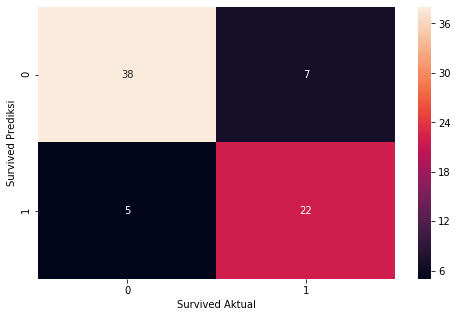

In [10]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Survived Aktual")
plt.ylabel("Survived Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.76      0.81      0.79        27

    accuracy                           0.83        72
   macro avg       0.82      0.83      0.82        72
weighted avg       0.84      0.83      0.83        72



## Decision Tree Classifier

In [12]:
x = titanic[['Pclass','Age','SibSp','Parch','Fare','male','female']]
y = titanic['Survived']
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x, y, test_size=0.10, shuffle=False)

In [13]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
y_pred_tree = model_tree.predict(x_test_tree)

[Text(581.4073984526112, 1057.0, 'X[6] <= 0.5\ngini = 0.484\nsamples = 642\nvalue = [379, 263]'),
 Text(219.5033849129594, 996.6, 'X[1] <= 13.0\ngini = 0.333\nsamples = 408\nvalue = [322, 86]'),
 Text(43.17214700193424, 936.2, 'X[2] <= 2.5\ngini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(25.903288201160542, 875.8, 'X[3] <= 0.5\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(17.268858800773696, 815.4000000000001, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.634429400386848, 755.0, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(25.903288201160542, 755.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(34.53771760154739, 815.4000000000001, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(60.441005802707934, 875.8, 'X[1] <= 3.5\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(51.806576402321085, 815.4000000000001, 'X[1] <= 2.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(43.17214700193424, 755.0, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),

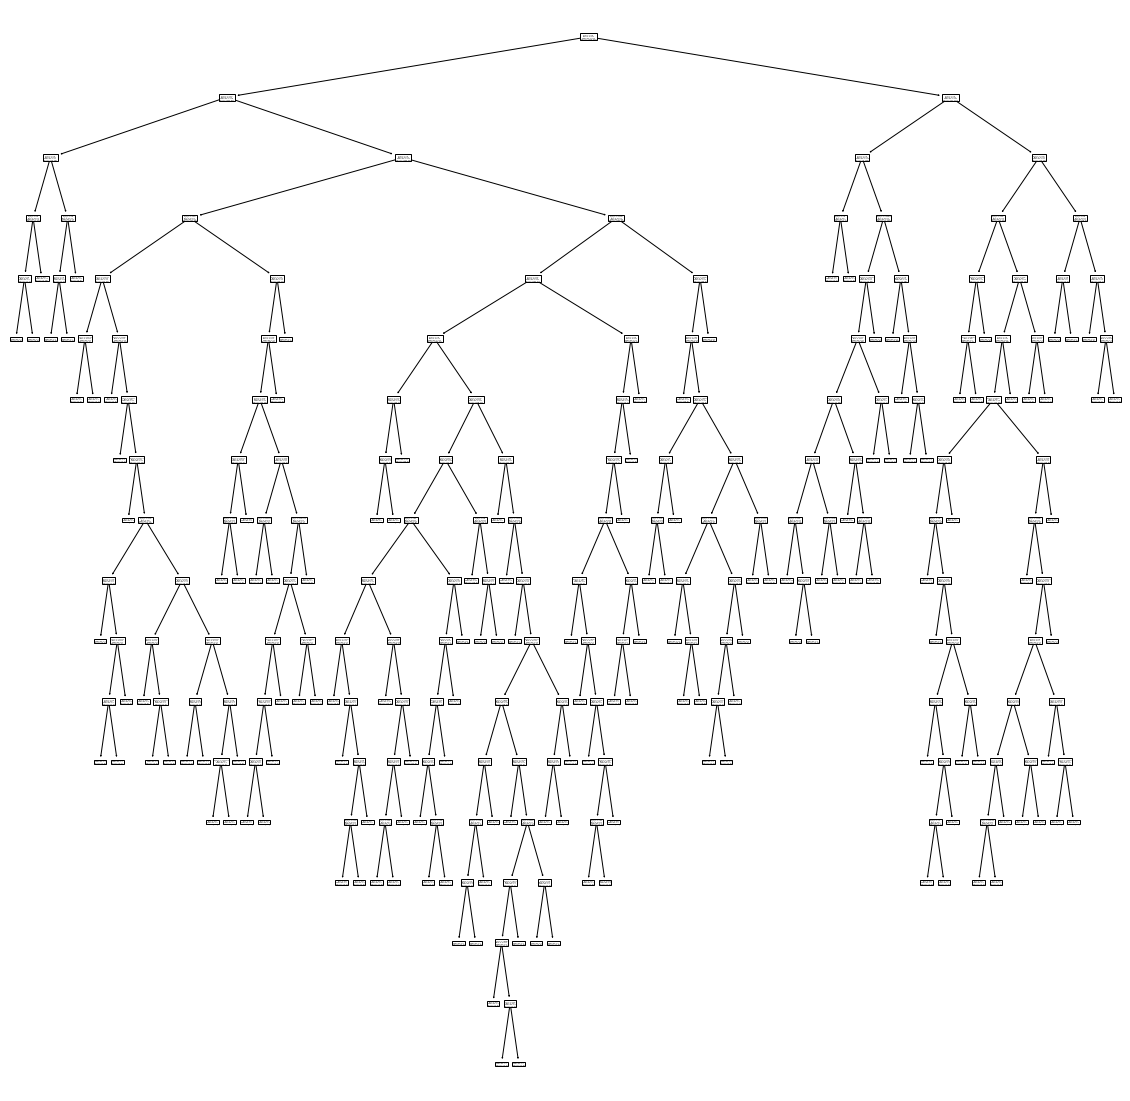

In [15]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(model_tree.fit(x_train_tree, y_train_tree))

In [16]:
DT_columns = x_train_tree.columns.tolist()
class_name = ['Survived', 'Not Survived']

In [17]:
tree.export_graphviz(
    model_tree.fit(x_train_tree, y_train_tree),
    out_file = 'decision_titanic.dot',
    feature_names = DT_columns,
    class_names = class_name
)

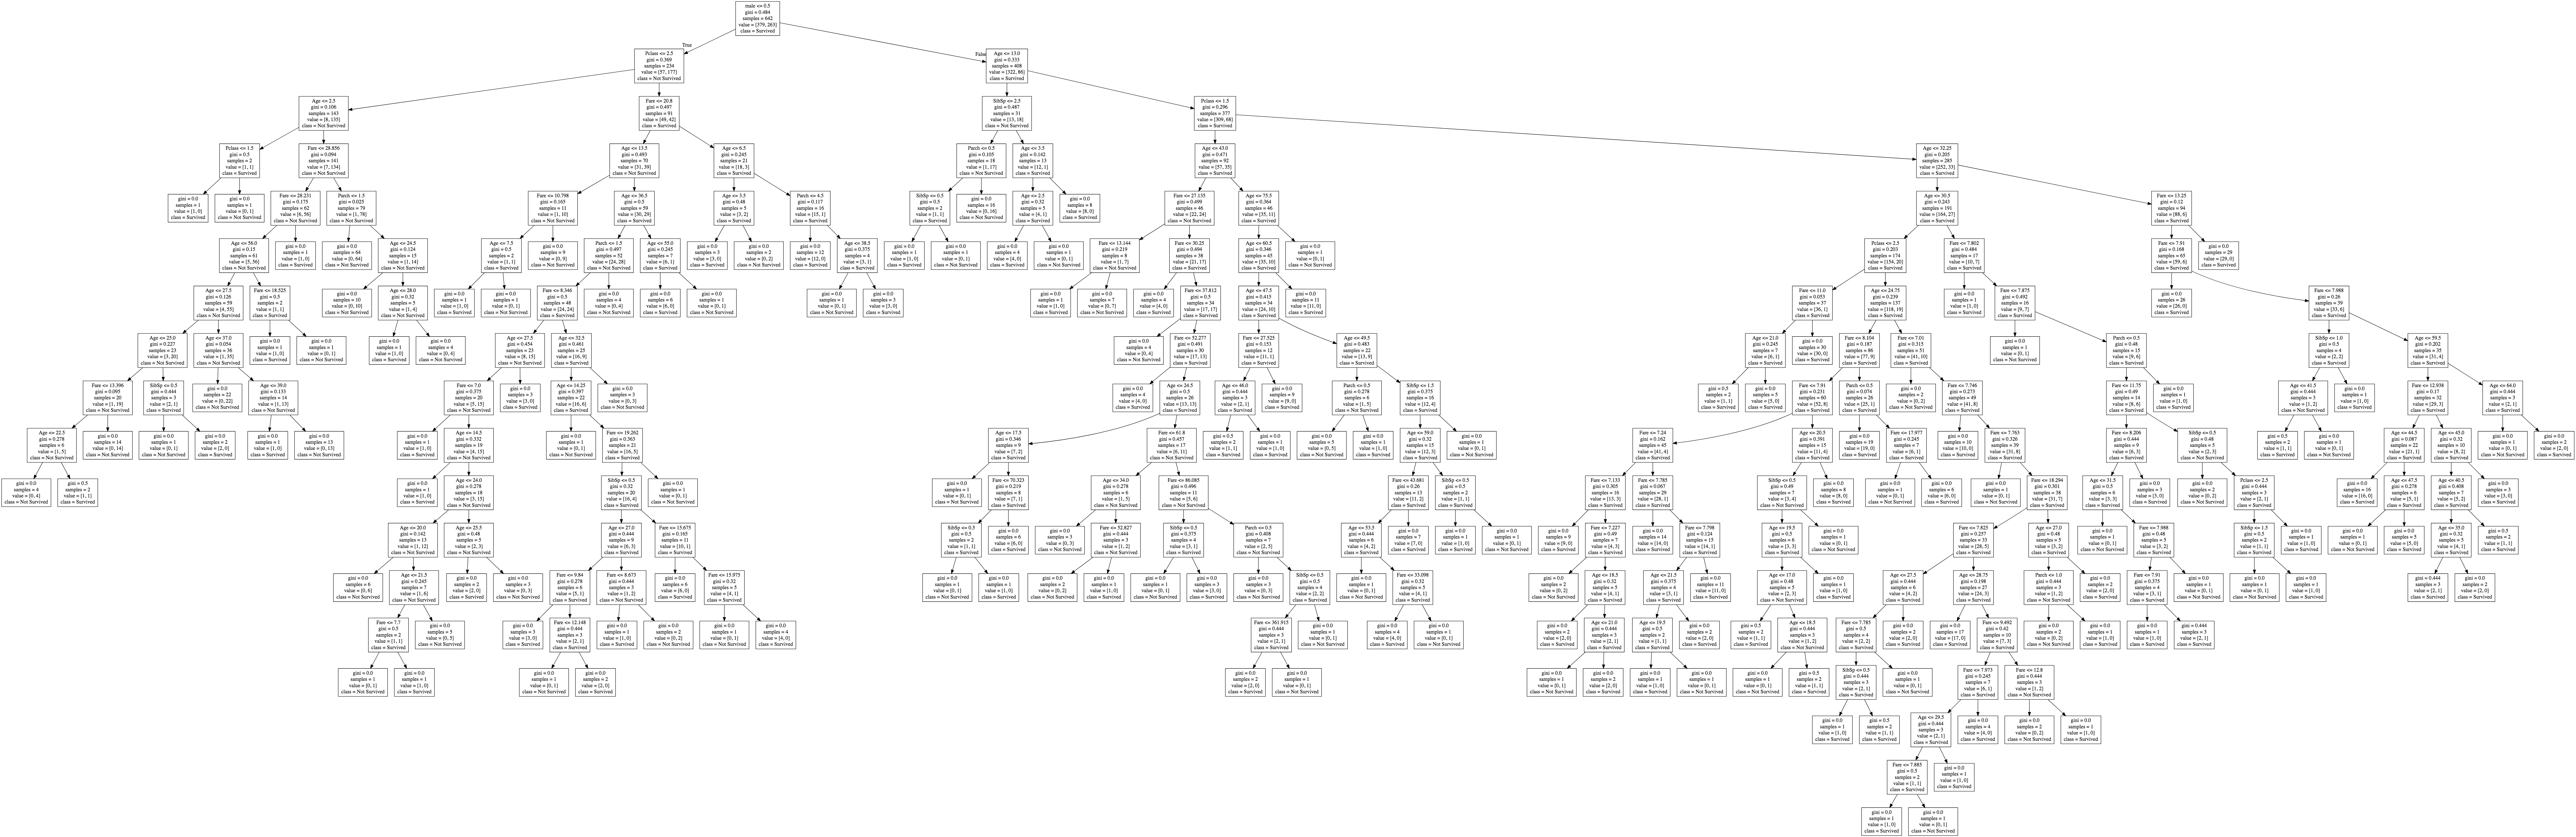

In [18]:
from PIL import Image
image = Image.open('/Users/muhammadramzy/Downloads/graphviz (3).png')
image

In [19]:
confusion_matrix(y_test_tree, y_pred_tree)

array([[38,  7],
       [ 4, 23]])

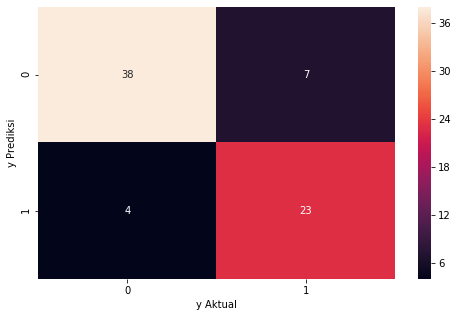

In [20]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_tree, y_pred_tree), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [21]:
print(classification_report(y_test_tree, y_pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.77      0.85      0.81        27

    accuracy                           0.85        72
   macro avg       0.84      0.85      0.84        72
weighted avg       0.85      0.85      0.85        72



## ROC

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [23]:
fpr0, tpr0, thrs0 = roc_curve(
    y_test_tree, model_tree.predict_proba(x_test_tree)[:, 0])
fpr0

array([0.        , 0.82222222, 0.84444444, 1.        ])

In [24]:
fpr0_log, tpr0_log, thrs0_log = roc_curve(
    y_test_tree, model.predict_proba(x_test_tree)[:, 0])
fpr0_log

array([0.        , 0.02222222, 0.33333333, 0.33333333, 0.55555556,
       0.55555556, 0.73333333, 0.73333333, 0.77777778, 0.77777778,
       0.84444444, 0.84444444, 0.88888889, 0.88888889, 0.93333333,
       0.93333333, 0.95555556, 0.95555556, 1.        , 1.        ])

In [25]:
fpr1, tpr1, thrs1 = roc_curve(
    y_test_tree, model_tree.predict_proba(x_test_tree)[:, 1])
fpr1

array([0.        , 0.15555556, 0.17777778, 1.        ])

In [26]:
fpr1_log, tpr1_log, thrs1_log = roc_curve(
    y_test, model.predict_proba(x_test)[:, 1])
fpr1_log

array([0.        , 0.        , 0.        , 0.04444444, 0.04444444,
       0.06666667, 0.06666667, 0.11111111, 0.11111111, 0.15555556,
       0.15555556, 0.22222222, 0.22222222, 0.26666667, 0.26666667,
       0.44444444, 0.44444444, 0.66666667, 0.66666667, 1.        ])

In [27]:
auc0 = auc(fpr0,tpr0)
auc1 = auc(fpr1,tpr1)

auc0,auc1

(0.19135802469135804, 0.808641975308642)

In [28]:
auc0log = auc(fpr0_log,tpr0_log)
auc1log = auc(fpr1_log,tpr1_log)

auc0log,auc1log

(0.10617283950617283, 0.8938271604938272)

In [29]:
auC = roc_auc_score(y_test_tree, y_pred_tree)
auC

0.8481481481481481

In [30]:
auClog = roc_auc_score(y_test, y_pred)
auClog

0.8296296296296296

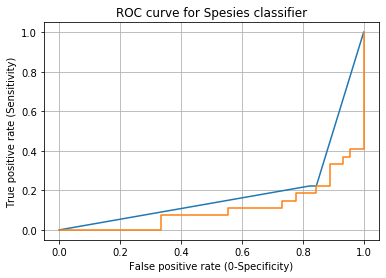

In [31]:
plt.plot(fpr0, tpr0)
plt.plot(fpr0_log, tpr0_log)

plt.title('ROC curve for Spesies classifier')
plt.xlabel('False positive rate (0-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

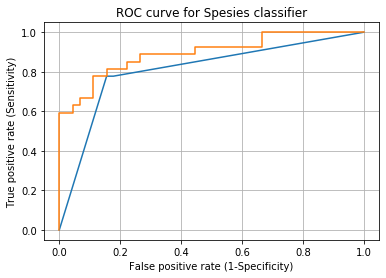

In [32]:
plt.plot(fpr1, tpr1)
plt.plot(fpr1_log, tpr1_log)

plt.title('ROC curve for Spesies classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
x = titanic[['Pclass','Age','SibSp','Parch','Fare','male','female']]
y = titanic['Survived']
x_train_forest, x_test_forest, y_train_forest, y_test_forest = train_test_split(x, y, test_size=0.10, shuffle=False)

In [35]:
model_forest = RandomForestClassifier()
model_forest.fit(x_train_forest, y_train_forest)

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred_forest = model_forest.predict(x_test_forest)

In [37]:
confusion_matrix(y_test_forest, y_pred_forest)

array([[42,  3],
       [ 5, 22]])

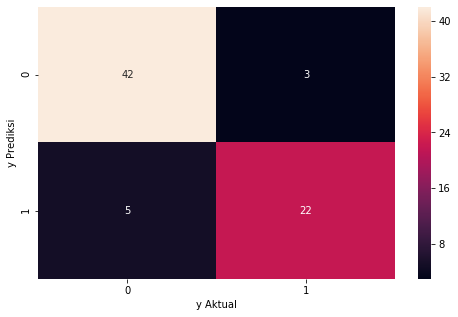

In [38]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test_forest, y_pred_forest), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y Aktual")
plt.ylabel("y Prediksi")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [39]:
print(classification_report(y_test_forest, y_pred_forest))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        45
           1       0.88      0.81      0.85        27

    accuracy                           0.89        72
   macro avg       0.89      0.87      0.88        72
weighted avg       0.89      0.89      0.89        72



In [40]:
model_forest.score(x_test_forest,y_test_forest)

0.8888888888888888

In [41]:
fpr0_forest, tpr0_forest, thrs0_forest = roc_curve(
    y_test_forest, model_forest.predict_proba(x_test_forest)[:, 0])
fpr0_forest

array([0.        , 0.4       , 0.42222222, 0.55555556, 0.57777778,
       0.75555556, 0.82222222, 0.86666667, 0.88888889, 0.93333333,
       0.93333333, 0.95555556, 0.95555556, 0.95555556, 1.        ])

In [42]:
fpr1_forest, tpr1_forest, thrs1_forest = roc_curve(
    y_test_forest, model_forest.predict_proba(x_test_forest)[:, 1])
fpr1_forest

array([0.        , 0.04444444, 0.04444444, 0.04444444, 0.06666667,
       0.06666667, 0.11111111, 0.13333333, 0.17777778, 0.24444444,
       0.42222222, 0.44444444, 0.57777778, 0.6       , 1.        ])

In [43]:
auc0f = auc(fpr0_forest,tpr0_forest)
auc1f = auc(fpr1_forest,tpr1_forest)

auc0f,auc1f

(0.09341563786008228, 0.9065843621399177)

In [44]:
auCf = roc_auc_score(y_test_forest, y_pred_forest)
auCf

0.8740740740740741

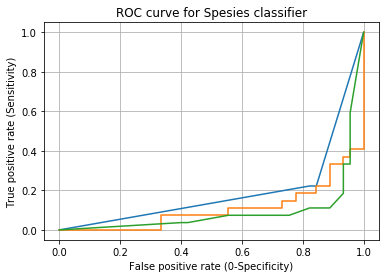

In [45]:
plt.plot(fpr0, tpr0)
plt.plot(fpr0_log, tpr0_log)
plt.plot(fpr0_forest, tpr0_forest)

plt.title('ROC curve for Spesies classifier')
plt.xlabel('False positive rate (0-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

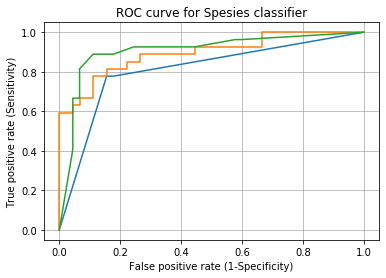

In [46]:
plt.plot(fpr1, tpr1)
plt.plot(fpr1_log, tpr1_log)
plt.plot(fpr1_forest, tpr1_forest)

plt.title('ROC curve for Spesies classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

## Hyperparameter

In [47]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [48]:
model_tree.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [49]:
model_forest.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
modelRS = RandomizedSearchCV(estimator = model, param_distributions = param, cv = 5, error_score=np.nan)

In [52]:
modelRS.fit(x_train, y_train)
modelRS.best_params_

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarnin

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 1}

In [53]:
from sklearn.model_selection import GridSearchCV
modelGS = GridSearchCV(model, param, cv=5, error_score=np.nan)
modelGS.fit(x_train,y_train)
modelGS.best_params_

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: Conver

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: Converg

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/muhammadramzy/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

{'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [54]:
max_depth = [10, 20, 30, 40,50,60,70,80,90,100, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

param2 = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
param2

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [55]:
modelRS2 = RandomizedSearchCV(estimator = model_tree, param_distributions = param2, cv = 5, error_score=np.nan)

In [56]:
modelRS2.fit(x_train_tree, y_train_tree)
modelRS2.best_params_

{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 60}

In [57]:
modelGS2 = GridSearchCV(model_tree, param2, cv=5, error_score=np.nan)
modelGS2.fit(x_train_tree ,y_train_tree)
modelGS2.best_params_

{'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10}

## Test

In [62]:
model_treeRS = DecisionTreeClassifier(min_samples_split= 10, min_samples_leaf= 2, max_depth= 20)
model_treeRS.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
y_pred_treeRS = model_treeRS.predict(x_test_tree)

In [64]:
confusion_matrix(y_test_tree, y_pred_treeRS)

array([[36,  9],
       [ 6, 21]])

In [65]:
print(classification_report(y_test_tree, y_pred_treeRS))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        45
           1       0.70      0.78      0.74        27

    accuracy                           0.79        72
   macro avg       0.78      0.79      0.78        72
weighted avg       0.80      0.79      0.79        72



In [66]:
model_treeGS = DecisionTreeClassifier(max_depth= 60, min_samples_leaf= 2, min_samples_split= 10)
model_treeGS.fit(x_train_tree, y_train_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=60,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
y_pred_treeGS = model_treeGS.predict(x_test_tree)

In [68]:
confusion_matrix(y_test_tree, y_pred_treeGS)

array([[36,  9],
       [ 6, 21]])

## KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
y_pred_knn = model_knn.predict(x_test)

In [74]:
confusion_matrix(y_test, y_pred_knn)

array([[38,  7],
       [ 6, 21]])

In [73]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        45
           1       0.75      0.78      0.76        27

    accuracy                           0.82        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.82      0.82      0.82        72



In [75]:
k = round(len(x_train) ** .5)
k

25

In [77]:
model_knn2 = KNeighborsClassifier(n_neighbors=k)
model_knn2.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [78]:
y_pred_knn2 = model_knn2.predict(x_test)

In [79]:
confusion_matrix(y_test, y_pred_knn2)

array([[41,  4],
       [14, 13]])

In [80]:
print(classification_report(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        45
           1       0.76      0.48      0.59        27

    accuracy                           0.75        72
   macro avg       0.76      0.70      0.71        72
weighted avg       0.75      0.75      0.73        72



In [82]:
model_knn.score(x_test,y_test)

0.8194444444444444

In [83]:
model_knn2.score(x_test,y_test)

0.75